## ProCast results 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

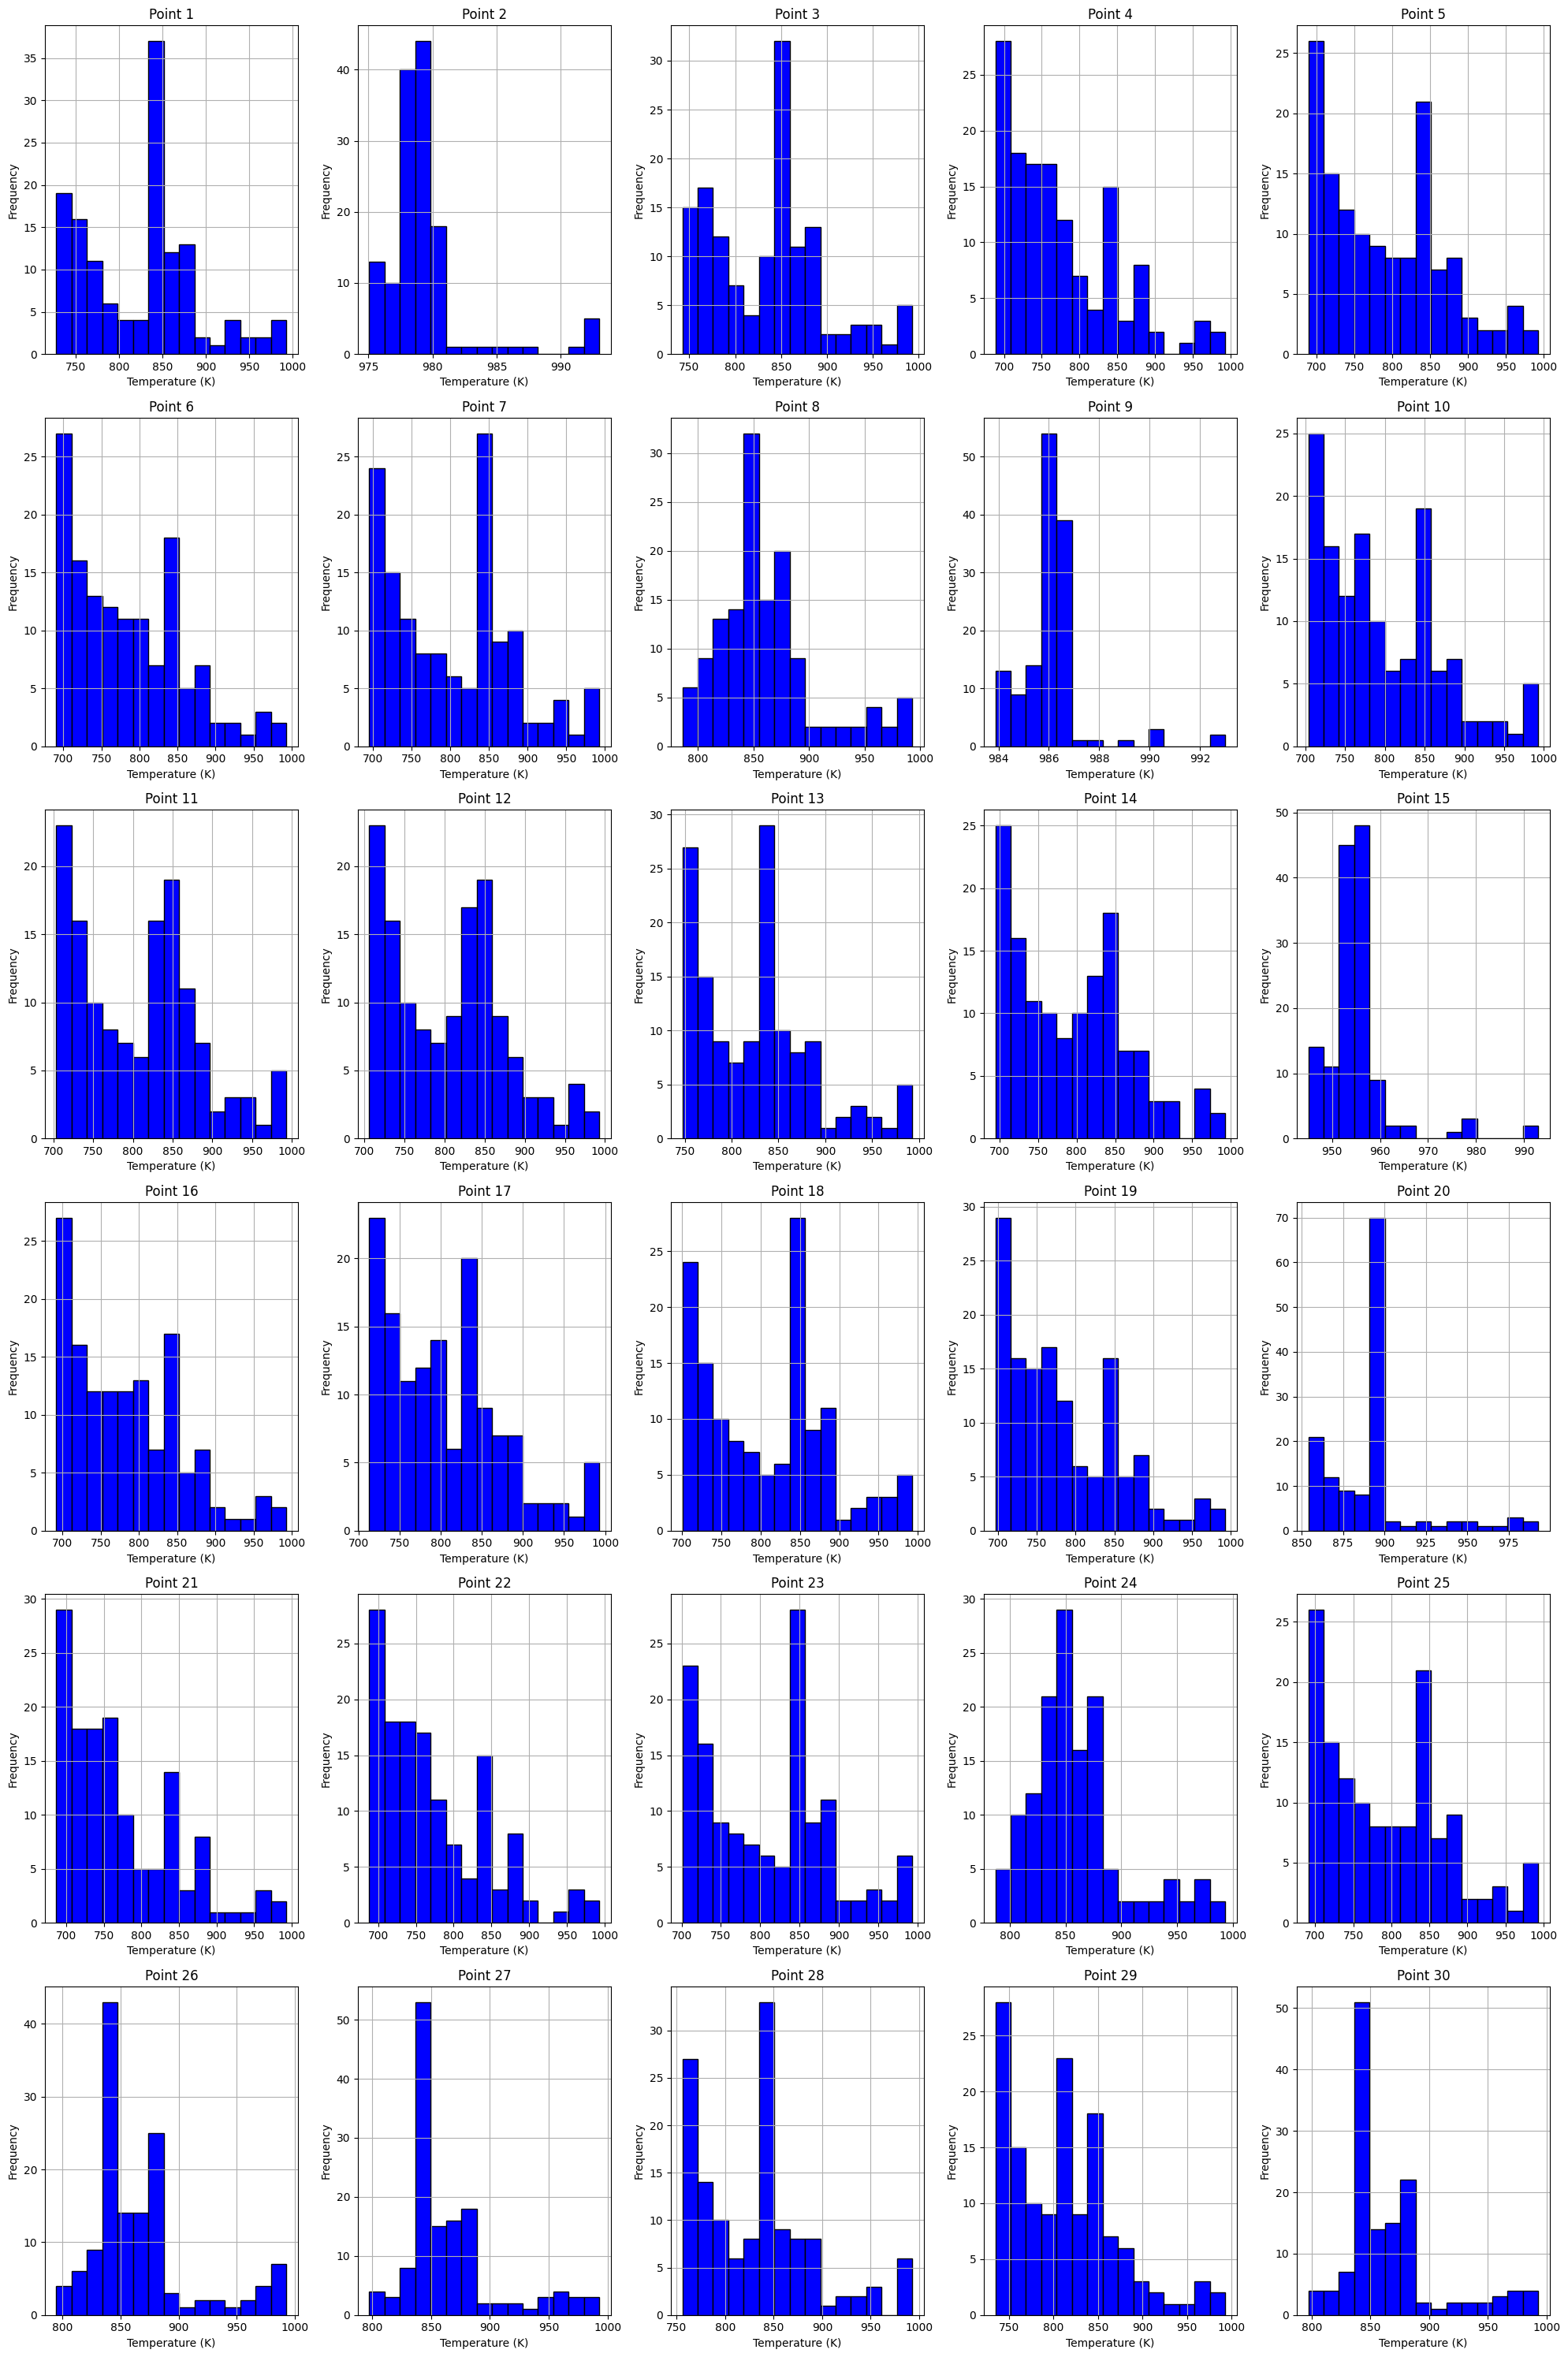

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load all CSV files from the folder
folder_path = 'teste'  # Replace with your folder path
all_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]

# Step 2: Choose random points from the first state (CSV file)
first_state_df = pd.read_csv(all_files[0])
random_points = first_state_df.sample(n=30, random_state=42)  # Randomly select 30 points
random_coordinates = random_points[['X', 'Y', 'Z']]  # Extract coordinates of the random points

# Step 3: For each state, extract temperatures for the chosen points
point_temperature_data = []

for file in all_files:
    state_df = pd.read_csv(file)
    # Merge the state data with the random points based on coordinates
    merged_df = pd.merge(random_coordinates, state_df, on=['X', 'Y', 'Z'], how='left')
    point_temperature_data.append(merged_df['Temperature(K)'])

# Step 4: Create a DataFrame for each point
point_temperature_df = pd.DataFrame(point_temperature_data).T  # Transpose to have points as rows
point_temperature_df.columns = [f'State_{i+1}' for i in range(len(all_files))]  # Rename columns

# Step 5: Plot all 30 histograms in one figure
plt.figure(figsize=(20, 30))  # Adjust the figure size to accommodate all subplots
num_points = len(point_temperature_df)
num_cols = 5  # Number of columns in the subplot grid
num_rows = int(np.ceil(num_points / num_cols))  # Calculate the number of rows needed

for index, row in point_temperature_df.iterrows():
    plt.subplot(num_rows, num_cols, index + 1)  # Create a subplot for each point
    plt.hist(row, bins=15, color='blue', edgecolor='black')
    plt.title(f'Point {index + 1}')
    plt.xlabel('Temperature (K)')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()






['/home/scohail/Desktop/LowCast_AI-Simulation/Data_664C/state000000000001.csv', '/home/scohail/Desktop/LowCast_AI-Simulation/Data_664C/state000000000251.csv', '/home/scohail/Desktop/LowCast_AI-Simulation/Data_664C/state000000000501.csv', '/home/scohail/Desktop/LowCast_AI-Simulation/Data_664C/state000000000751.csv', '/home/scohail/Desktop/LowCast_AI-Simulation/Data_664C/state000000001001.csv', '/home/scohail/Desktop/LowCast_AI-Simulation/Data_664C/state000000001251.csv', '/home/scohail/Desktop/LowCast_AI-Simulation/Data_664C/state000000001501.csv', '/home/scohail/Desktop/LowCast_AI-Simulation/Data_664C/state000000001751.csv', '/home/scohail/Desktop/LowCast_AI-Simulation/Data_664C/state000000002001.csv', '/home/scohail/Desktop/LowCast_AI-Simulation/Data_664C/state000000002251.csv', '/home/scohail/Desktop/LowCast_AI-Simulation/Data_664C/state000000002501.csv', '/home/scohail/Desktop/LowCast_AI-Simulation/Data_664C/state000000002751.csv', '/home/scohail/Desktop/LowCast_AI-Simulation/Data_6

<Figure size 1500x2000 with 0 Axes>

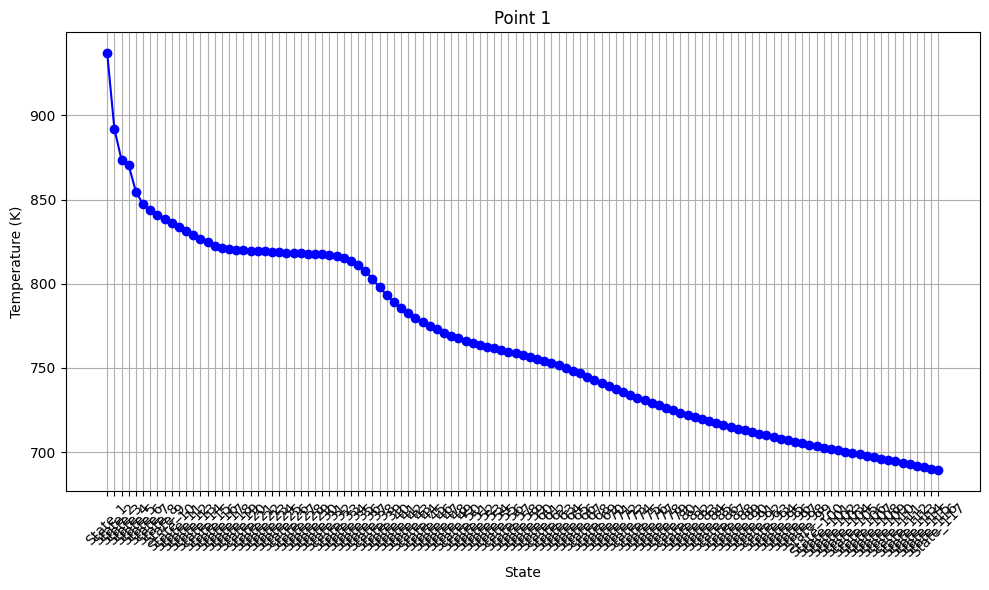

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load all CSV files from the folder
folder_path = '/home/scohail/Desktop/LowCast_AI-Simulation/Data_664C'  # Replace with your folder path
all_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]
all_files.sort(key=lambda x: int(x.split('state')[-1].split('.csv')[0]))


print(all_files)

# Step 2: Choose random points from the first state (CSV file)
# first_state_df = pd.read_csv(all_files[0])
# random_points = first_state_df.sample(n=30, random_state=42)  # Randomly select 30 points


# print(random_points)

#choose a specific point

random_points = pd.DataFrame({'X': [2.2771757], 'Y': [0.92087674], 'Z': [-4.2632566e-15]})



random_coordinates = random_points[['X', 'Y', 'Z']]  # Extract coordinates of the random points

# # Step 3: For each state, extract temperatures for the chosen points
point_temperature_data = []

for file in all_files:
    state_df = pd.read_csv(file)
    # Merge the state data with the random points based on coordinates
    merged_df = pd.merge(random_coordinates, state_df, on=['X', 'Y', 'Z'], how='left')
    point_temperature_data.append(merged_df['Temperature(K)'])

# Step 4: Create a DataFrame for each point
point_temperature_df = pd.DataFrame(point_temperature_data).T  # Transpose to have points as rows
point_temperature_df.columns = [f'State_{i+1}' for i in range(len(all_files))]  # Rename columns

# Step 5: Plot temperature as a function of states for each point
plt.figure(figsize=(15, 20))  # Adjust the figure size to accommodate all subplots
num_points = len(point_temperature_df)
num_cols = 5  # Number of columns in the subplot grid
num_rows = int(np.ceil(num_points / num_cols))  # Calculate the number of rows needed

for index, row in point_temperature_df.iterrows():
    plt.figure(figsize=(10, 6))
    # plt.subplot(num_rows, num_cols, index + 1)  # Create a subplot for each point
    plt.plot(row, marker='o', linestyle='-', color='blue')  # Line plot with markers
    plt.title(f'Point {index + 1}')
    plt.xlabel('State')
    plt.ylabel('Temperature (K)')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(True)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## Testing Models

In [1]:
import pandas as pd
import glob
import os


In [2]:

# Path to the folder containing CSV files
folder_path = "/home/scohail/Desktop/LowCast_AI-Simulation/Data_664C"

# Get all CSV files in the folder
csv_files = sorted(glob.glob(os.path.join(folder_path, "state*.csv")))

# Initialize an empty DataFrame
final_df = None



In [3]:
for file in csv_files:
    # Extract the state number from the filename
    state_number = os.path.basename(file).replace("state", "").lstrip("0")
    
    # Read CSV file
    df = pd.read_csv(file)

    # Filter rows where Z == -4.2632566e-15
    df_filtered = df[df["Z"] == -4.2632566e-15][["X", "Y", "Temperature(K)"]]

    # Rename temperature column to reflect the state number
    df_filtered.rename(columns={"Temperature(K)": f"TempState{state_number}"}, inplace=True)

    # Merge with the final DataFrame
    if final_df is None:
        final_df = df_filtered
    else:
        final_df = pd.merge(final_df, df_filtered, on=["X", "Y"], how="outer")

# Save the final DataFrame or display it
print(final_df)
# final_df.to_csv("merged_temperatures.csv", index=False)


             X          Y  TempState1.csv  TempState251.csv  TempState501.csv  \
0    -3.323856   6.720222           937.0         909.17980         897.31050   
1    -3.305937   6.905824           937.0         907.05740         895.38367   
2    -3.300470   6.813534           937.0         908.35830         896.53530   
3    -3.299726   6.204810           937.0         914.57080         902.51746   
4    -3.294462   7.078054           937.0         904.70230         893.33640   
...        ...        ...             ...               ...               ...   
4622  5.832240 -15.627687           937.0         903.41930         886.10675   
4623  5.833679 -15.924137           937.0         902.10740         885.99070   
4624  5.846610 -15.526989           937.0         903.26390         886.01215   
4625  5.846827 -15.426255           937.0         903.11053         885.98785   
4626  5.860583 -15.343610           937.0         902.65936         885.84870   

      TempState751.csv  Tem